## What is clustering

`As we described earlier, clustering is the task of partitioning the dataset into groups,
called clusters. The goal is to split up the data in such a way that points within a single
cluster are very similar and points in different clusters are different. Similarly to clas‐
sification algorithms, clustering algorithms assign (or predict) a number to each data
point, indicating which cluster a particular point belongs to`

<img src='../../images/cluster.gif'>

## Clustring Applications

`clustring algorithms are very popular and used in a variety of applications such as market segmentation, document clustering, image segmentation and image compression`

## What is k-means clustering

`k-means clustering is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the
data`

## How k-means works 

`1. Pick K points as the initial centroids from the data set, either randomly or the first K.`

`2. Find the Euclidean distance of each point in the data set with the identified K points — cluster centroids.`

`3. Assign each data point to the closest centroid using the distance found in the previous step.`

`4. Find the new centroid by taking the average of the points in each cluster group.`

`5. Repeat 2 to 4 for a fixed number of iteration or till the centroids don’t change.`

In [1]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/5I3Ei69I40s?rel=0&amp;controls=1&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

/home/mohamed-mossad/Projects/machine-learning-course/venv/local/lib/python3.6/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## python implementation (optional reading)

In [2]:
from scipy.spatial.distance import cdist
def kmeans(X,k,max_iterations=100):
    '''
    X: multidimensional data
    k: number of clusters
    max_iterations: number of repetitions before clusters are established
    
    Steps:
    1. Convert data to numpy aray
    2. Pick indices of k random point without replacement
    3. Find class (P) of each data point using euclidean distance
    4. Stop when max_iteration are reached of P matrix doesn't change
    
    Return:
    np.array: containg class of each data point
    '''
    # choose k random indexes from the data
    idx = np.random.choice(len(X), k, replace=False)
    # extract k centroids at these positions
    centroids = X[idx, :]
    # assign to every data point cluster based on distance between the point and the cluster centroid
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    for _ in range(max_iterations):
        # compute average distance between all points assigned to every centroid and update the centroids
        centroids = [X[P==i,:].mean(axis=0) for i in range(k)].reshape(2,-1)
        # again assign to every data point cluster based on distance between the point and the cluster centroid
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):
            break # indication of no updates in centroids
        P = tmp
    return P

## k-means in sklearn

In [3]:
from sklearn.cluster import KMeans
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

model = KMeans(n_clusters=2).fit(X)

print("centers >>> \n",model.cluster_centers_)
print("*"*50)
print("Inertia >>> \n",model.inertia_)
print("*"*50)
print("predict new data sample means assign it inot cluster centroid \n")
print(model.predict([[12, 3]]))

centers >>> 
 [[10.  2.]
 [ 1.  2.]]
**************************************************
Inertia >>> 
 16.0
**************************************************
predict new data sample means assign it inot cluster centroid 

[0]


## How to choose number of clusters

/home/mohamed-mossad/Projects/machine-learning-course/venv/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Dataset


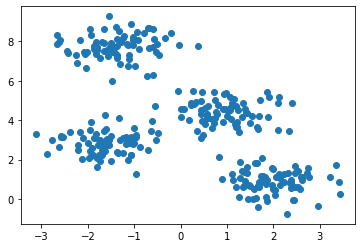

In [4]:
# generate fake data , just for illustration
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
print("Dataset")

`most common way to find number of clusters is know as "Elbow Method"`

`assume that you have data clustered in 4 centers , if you try to fit kmeans algorithm on this data with 1 centroid`
`then the average distances between dataset and points will be very high`
`gradually incrreasing number of clusters will reduce the average distances until specefic point where it is the best number of clusters to use`


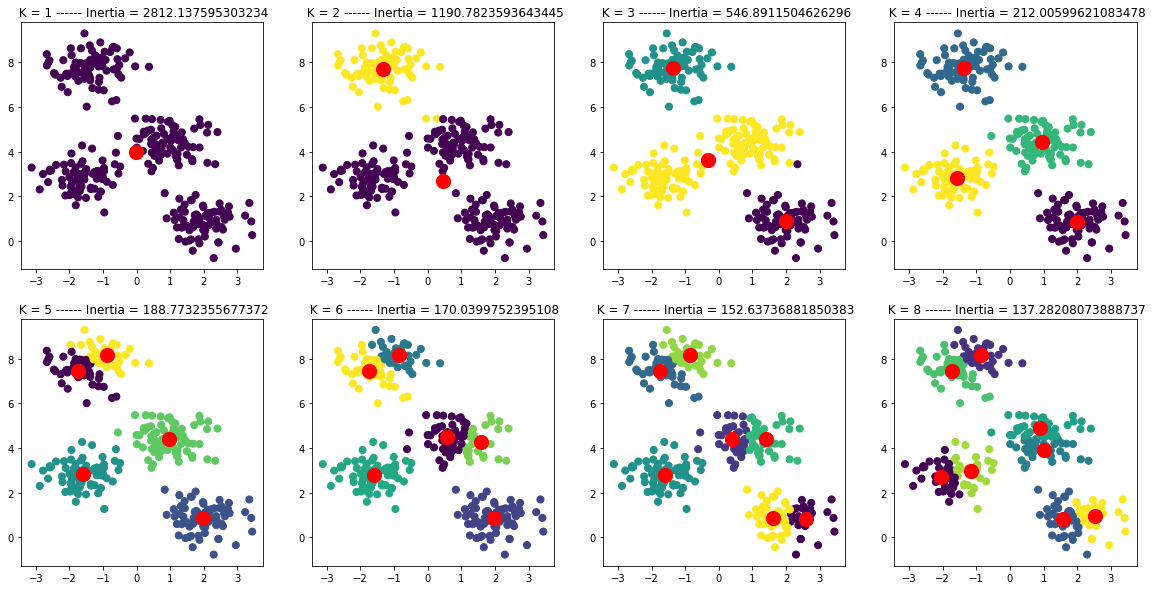

In [5]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(20,10)) # new figure object
for i in range(1,9): # try k from 1 >> 8
    ax = fig.add_subplot(2, 4, i)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    # plot predicted centers vs all data points
    clusters_preds = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=clusters_preds, s=50)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1)
    plt.title(" K = {} ------ Inertia = {}".format(i,kmeans.inertia_))

In [6]:
inertia = []
for i in range(1,9): # try k from 1 >> 8
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

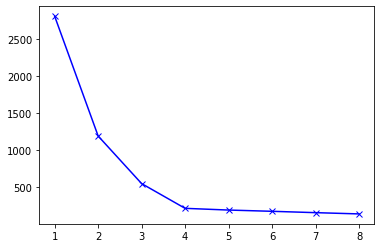

In [7]:
# plot inertia vs K
plt.plot(list(range(1,9)),inertia,'bx-')